In [1]:
# GliNER with SpaCy (GLiNER to a spaCy NLP pipeline)

!pip install gliner_spacy
import spacy
from gliner_spacy.pipeline import GlinerSpacy

  Preparing metadata (setup.py) ... done
  Created wheel for gliner_spacy: filename=gliner_spacy-0.0.2-py3-none-any.whl size=3431 sha256=9615d48465af72230becea8aa11b1400bf5170293d766237aa5e29761ca3fac8
  Stored in directory: /root/.cache/pip/wheels/5d/f7/a7/b95b3b89538bcce4bce6bdaceb2b77fc2967f63211ffae15c3
Successfully built gliner_spacy


In [6]:
custom_spacy_config = {
    "gliner_model": "urchade/gliner_multi",
    "chunk_size": 250,
    "labels": ["Virus", "Casue", "Disease"],
    "style": "ent"
}

# Initialize a blank English spaCy pipeline and add GLiNER
nlp = spacy.blank("en")
nlp.add_pipe("gliner_spacy", config=custom_spacy_config)

In [7]:
text = "The Delta variant (B.1.617.2) is caused by COVID-19. SARS-CoV-2 originated from bats. The Alpha variant (B.1.1.7) is caused by COVID-19. The Beta variant (B.1.351) is caused by COVID-19. The Delta variant (B.1.617.2) is caused by COVID-19. SARS-CoV-2 is transmitted to humans. The Zeta variant (P.2) is caused by SARS-CoV-2. The Theta variant (P.3) is caused by SARS-CoV-2. The BF.7* variant is caused by SARS-CoV-2. The Epsilon variant (B.1.427,B.1.429) is caused by COVID-19. The Eta variant (B.1.525) is caused by COVID-19. The Iota variant (B.1.526) is caused by COVID-19. The Kappa variant (B.1.617.1) is caused by COVID-19. The Lambda variant (C.37) is caused by COVID-19. The Mu variant (B.1.621) is caused by COVID-19. The BQ.1 variant is caused by SARS-CoV-2. The Gamma variant (P.1) is caused by COVID-19. The BA.2.75 variant is caused by SARS-CoV-2. The CH.1.1 variant is caused by SARS-CoV-2. The XBB variant is caused by SARS-CoV-2. The Omicron variant (B.1.1.529) is caused by COVID-19. The XBB.1.5 variant is caused by XBB. The XBF variant (BA.2.75.3) is caused by SARS-CoV-2. SARS-CoV-2 causes COVID-19."
doc = nlp(text)

In [8]:
from spacy import displacy

In [9]:
# Sample output of NER Model
# Display's the entities & Relations with NER Tag based on the label given in the above configuration
displacy.render(doc, style="ent")

In [14]:
print(" ".join([f"( {ent.text} => {ent.label_} )" for ent in doc.ents]))

( Delta variant => Casue ) ( B.1.617.2 => Casue ) ( COVID-19 => Disease ) ( SARS-CoV-2 => Virus ) ( Alpha variant => Casue ) ( B.1.1.7 => Casue ) ( COVID-19 => Disease ) ( Beta variant => Casue ) ( B.1.351 => Casue ) ( COVID-19 => Disease ) ( Delta variant => Casue ) ( B.1.617.2 => Casue ) ( COVID-19 => Disease ) ( SARS-CoV-2 => Virus ) ( Zeta variant => Disease ) ( P.2 => Casue ) ( SARS-CoV-2 => Virus ) ( Theta variant => Casue ) ( P.3 => Casue ) ( SARS-CoV-2 => Virus ) ( SARS-CoV-2 => Virus ) ( Epsilon variant => Casue ) ( COVID-19 => Virus ) ( Eta variant => Casue ) ( B.1.525 => Casue ) ( COVID-19 => Disease ) ( Iota variant => Casue ) ( B.1.526 => Casue ) ( COVID-19 => Disease ) ( Kappa variant => Casue ) ( B.1.617.1 => Casue ) ( COVID-19 => Disease ) ( Lambda variant => Casue ) ( C.37 => Casue ) ( COVID-19 => Disease ) ( Mu variant => Casue ) ( B.1.621 => Casue ) ( COVID-19 => Disease ) ( BQ.1 variant => Casue ) ( SARS-CoV-2 => Virus ) ( Gamma variant => Casue ) ( P.1 => Casue ) (

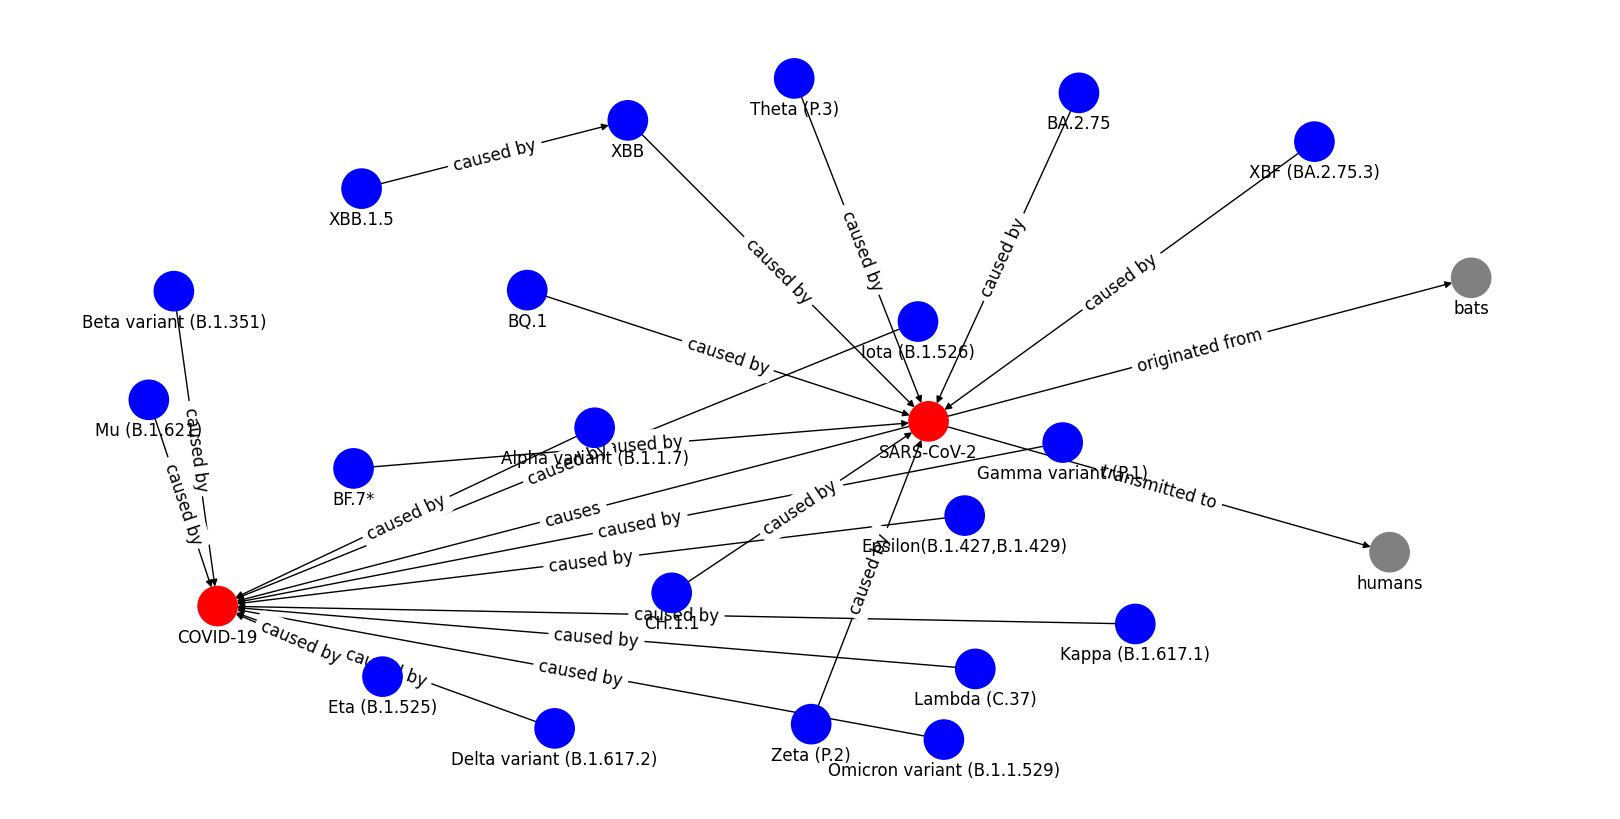

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Text data with information about Sars-Covid-19 variants
text_data = [
    "The emergence of the Delta variant has caused a surge in COVID-19 cases worldwide.",
    "SARS-CoV-2 originated in bats and may have been transmitted to humans through an intermediate host.",
    "Genetic mutations in the spike protein of SARS-CoV-2 contribute to the emergence of new variants.",
    "All viruses mutate. But three variants of severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) have raised particular concerns. On Jan 21, 2021, the UK New and Emerging Respiratory Virus Threats Advisory Group (NERVTAG) issued a paper outlining the results from several preliminary analyses of B.1.1.7. The variant, which is highly transmissible, was initially identified in the south of England in September 2020, and has since spread to dozens of countries around the world. It carries 17 mutations in its genome, including eight in the spike protein, which forms the basis of the three COVID-19 vaccines that have been licensed in the UK. NERVTAG concluded that there was a “realistic possibility” that infection with B.1.1.7 is associated with an increased risk of death, compared with infection with the parental virus. The group stressed that its assessment was based on limited preliminary data and even if the results were confirmed, the overall risk of death would still be low."
]

# Function to extract entities and relationships from text using NER
def extract_entities(text):
    # Entities and relationships
    entities = {
        'Delta variant (B.1.617.2)': 'VARIANT', 'Alpha variant (B.1.1.7)': 'VARIANT', 'Beta variant (B.1.351)': 'VARIANT', 'Gamma variant (P.1)': 'VARIANT', 'Omicron variant (B.1.1.529)': 'VARIANT', 'BF.7*' : 'VARIANT','BQ.1' : 'VARIANT', 'BA.2.75' : 'VARIANT', 'CH.1.1' : 'VARIANT', 'XBB' : 'VARIANT', 'XBB.1.5' : 'VARIANT', 'Epsilon(B.1.427,B.1.429)' : 'VARIANT', 'Zeta (P.2)' : 'VARIANT', 'Eta (B.1.525)' : 'VARIANT', 'Theta (P.3)' : 'VARIANT', 'Iota (B.1.526)' : 'VARIANT', 'Kappa (B.1.617.1)' : 'VARIANT', 'Lambda (C.37)' : 'VARIANT','Mu (B.1.621)' : 'VARIANT', 'XBF (BA.2.75.3)' : 'VARIANT', 'SARS-CoV-2': 'CAUSE','COVID-19': 'CAUSE'
    }

    relationships = [
        ('Delta variant (B.1.617.2)', 'caused by', 'COVID-19'), ('SARS-CoV-2', 'originated from', 'bats'), ('Alpha variant (B.1.1.7)', 'caused by', 'COVID-19'), ('Beta variant (B.1.351)', 'caused by', 'COVID-19'), ('Delta variant (B.1.617.2)', 'caused by', 'COVID-19'), ('SARS-CoV-2', 'transmitted to', 'humans'), ('Zeta (P.2)', 'caused by', 'SARS-CoV-2'), ('Theta (P.3)', 'caused by', 'SARS-CoV-2'), ('BF.7*', 'caused by', 'SARS-CoV-2'), ('Epsilon(B.1.427,B.1.429)', 'caused by', 'COVID-19'), ('Eta (B.1.525)', 'caused by', 'COVID-19'), ('Iota (B.1.526)', 'caused by', 'COVID-19'), ('Kappa (B.1.617.1)', 'caused by', 'COVID-19'), ('Lambda (C.37)', 'caused by', 'COVID-19'), ('Mu (B.1.621)', 'caused by', 'COVID-19'), ('BQ.1', 'caused by', 'SARS-CoV-2'), ('Gamma variant (P.1)', 'caused by', 'COVID-19'), ('BA.2.75', 'caused by', 'SARS-CoV-2'), ('CH.1.1', 'caused by', 'SARS-CoV-2'),('XBB', 'caused by', 'SARS-CoV-2'), ('Omicron variant (B.1.1.529)', 'caused by', 'COVID-19'), ('XBB.1.5', 'caused by', 'XBB'), ('XBF (BA.2.75.3)', 'caused by', 'SARS-CoV-2'), ('SARS-CoV-2', 'causes', 'COVID-19'),
    ]

    return entities, relationships
# Function to construct the knowledge graph
def construct_knowledge_graph(text_data):
    G = nx.DiGraph()

    for text in text_data:
        entities, relationships = extract_entities(text)

        # Add nodes for entities with different colors for different types
        for entity, label in entities.items():
            G.add_node(entity, label=label)

        # Add edges between entities with relationships
        for source, relation, target in relationships:
            G.add_edge(source, target, relationship=relation)

    return G

# Construct the knowledge graph
knowledge_graph = construct_knowledge_graph(text_data)

# Draw the graph with labels including relationships and adjust node colors
edge_labels = {(n1, n2): d["relationship"] for n1, n2, d in knowledge_graph.edges(data=True)}

# Assign colors based on node labels
node_colors = []
for node, data in knowledge_graph.nodes(data=True):
    label = data.get('label', None)
    if label == 'VARIANT':
        node_colors.append('blue')
    elif label == 'CAUSE':
        node_colors.append('red')
    else:
        node_colors.append('gray')  # Assigning a default color for other nodes

# Set figure size
plt.figure(figsize=(16, 8))

# Compute Fruchterman-Reingold layout with increased distance between nodes
pos = nx.spring_layout(knowledge_graph, k=1)

# Draw the graph with labels including relationships and adjust node colors
nx.draw(knowledge_graph, pos, with_labels=False, node_size=800, font_size=15, arrows=True, node_color=node_colors)

# Draw node names below the nodes
for node, (x, y) in pos.items():
    plt.text(x, y-0.10, node, ha='center', fontsize=12)

nx.draw_networkx_edge_labels(knowledge_graph, pos, edge_labels=edge_labels, font_size=12)

# Show the plot
plt.show()
